# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [99]:
from scipy import misc, ndimage
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

C:\Users\Relu\AppData\Local\Temp\ipykernel_14224\3936888326.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X = misc.face(gray=True)


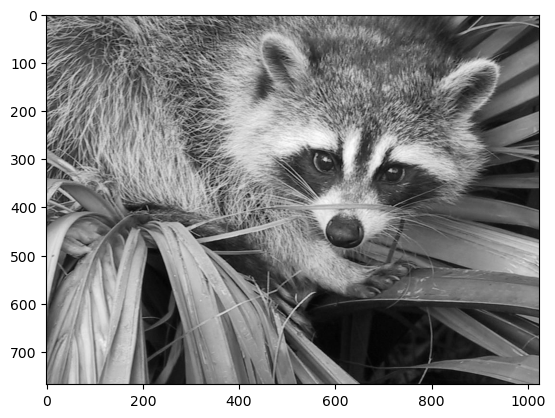

In [2]:
X = misc.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata Fourier a unei imagini

Transformata Fourier Discretă se extinde ușor la mai multe dimensiuni. Pentru un semnal bidimensional precum o imagine DFT devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}e^{-j2\pi(m_1 n_1/N_1 + m_2 n_2/N_2)}
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric
* proprietățile transformatei DFT 1D sunt respectate și în cazul celei 2D

În continuare vom folosi rutina generală `fft2` ce servește mai bine activității de învățare, deși pentru semnale reale ar trebui să folosim `rfft2` ce întoarce doar informația esențială (ex. omite simetriile). De asemenea vom analiza spectrul în scală logaritmică pentru a diferenția mai bine magnitudinile bin-urilor DTF.

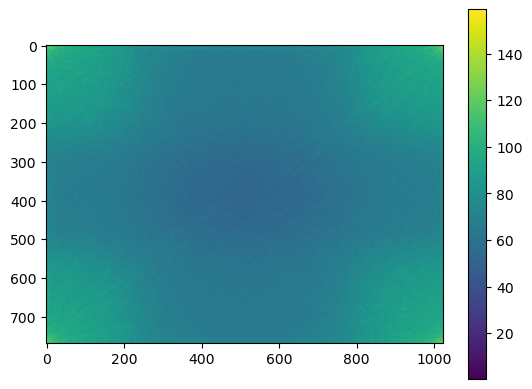

In [3]:
Y = np.fft.fft2(X)
freq_db = 20*np.log10(abs(Y))

plt.imshow(freq_db)
plt.colorbar()
plt.show()

Operațiile efectuate direct asupra imaginii se reflectă și în spectrul acesteia. Iată un exemplu a unei rotații de 45 de grade:

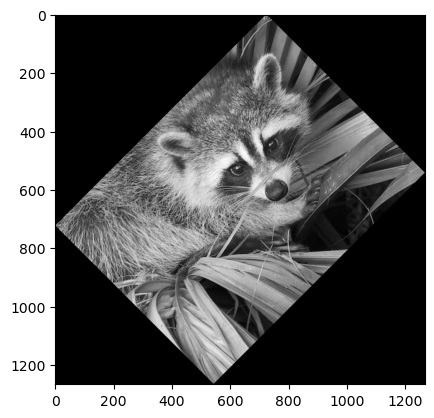

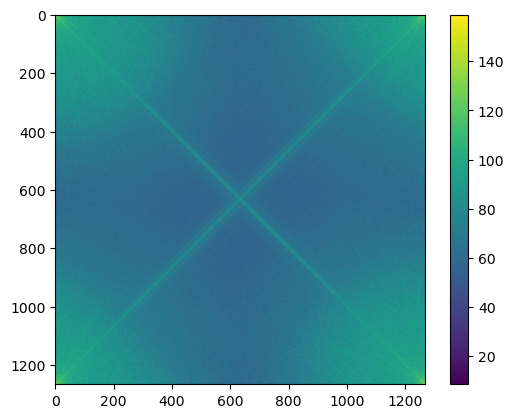

In [4]:
rotate_angle = 45
X45 = ndimage.rotate(X, rotate_angle)
plt.imshow(X45, cmap=plt.cm.gray)
plt.show()

Y45 = np.fft.fft2(X45)
plt.imshow(20*np.log10(abs(Y45)))
plt.colorbar()
plt.show()

Momentan pe axe sunt afișate numărul bin-urilor. Pentru a obține frecvențele asociate folosiți `fftfreq`:

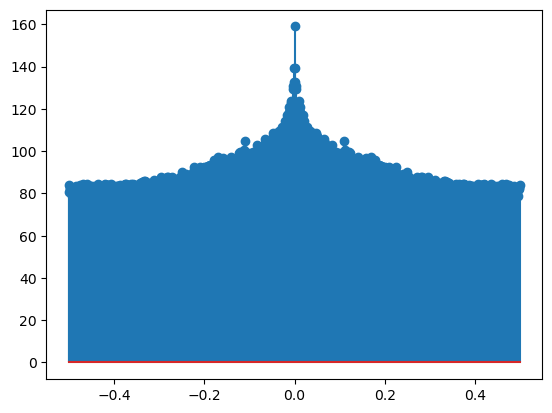

In [5]:
freq_x = np.fft.fftfreq(X.shape[1])
freq_y = np.fft.fftfreq(X.shape[0])

plt.stem(freq_x, freq_db[:][0])
plt.show()

# Atenuarea frecvențelor înalte

Pentru a anula frecvențele de peste un anumit prag `freq_cutoff` putem pur și simplu anula intrările din spectru și aplica transformata Fourier inversă:

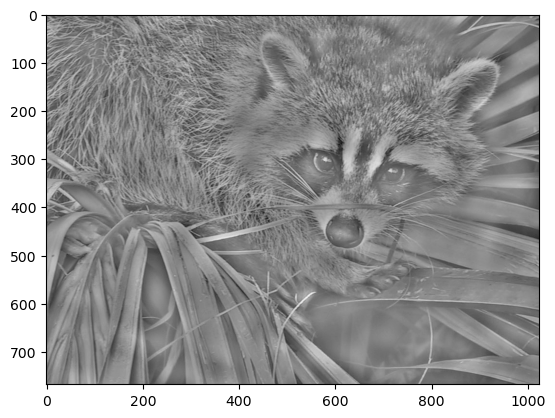

In [6]:
freq_cutoff = 120

Y_cutoff = Y.copy()
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                # in practice use irfft2
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()

# Zgomot

Zgomotul alb perturbă în mod egal spectrul semnalului. Este astfel egal distribuit și regăsit în toate bin-urile DFT. [Zgomotul color](https://en.wikipedia.org/wiki/Colors_of_noise) se schimbă de-a lungul frecvențelor.

Putem adăuga zgomot în limita a `pixel_noise` pixeli imaginii folosind `random.randint`:

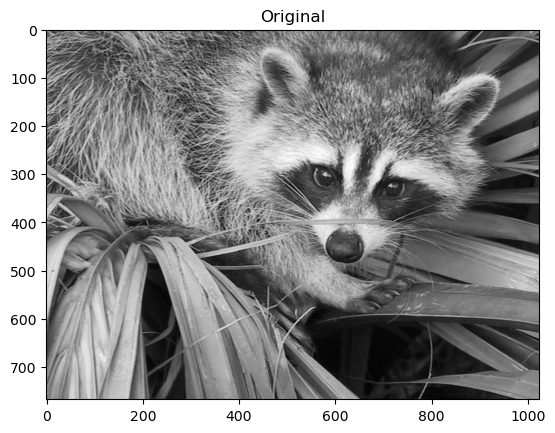

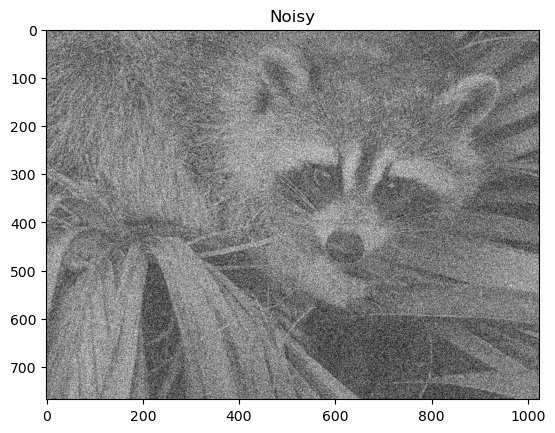

In [7]:
pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.show()
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()

# Sarcini

1. [8p] Produceți imaginile și spectrul pentru funcțiile de mai jos și dați o explicație scurtă pentru fiecare rezultat.
* $x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$
* $x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$
* $Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

*Atenție*: $x$ reprezintă informație în domeniul timpului, $Y$ în domeninul frecvenței.

2. [4p] Comprimați imaginea cu ratonul de mai sus prin atenuarea frecvențelor înalte până la un prag SNR autoimpus.

3. [4p] Eliminați zgomotul adăugat la imaginea cu ratonul produsă mai sus. Prezentați raportul SNR înainte și după.

4. [4p] Alegeți o secvență scurtă de timp (ex. 5-10 secunde) și eliminați un instrument la alegere din semnalul audio rezultat în urma rezolvării sarcinilor de la [laboratorul 5](https://cs.unibuc.ro/~pirofti/ps/ps-lab-5.pdf).

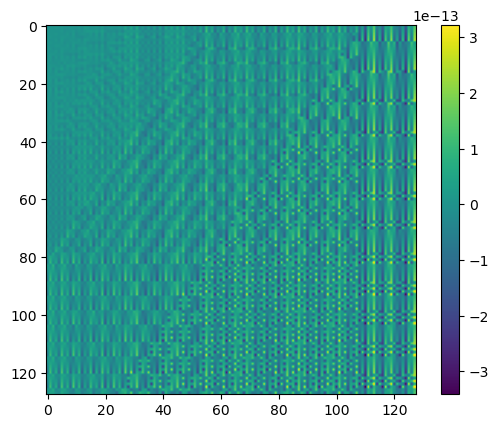

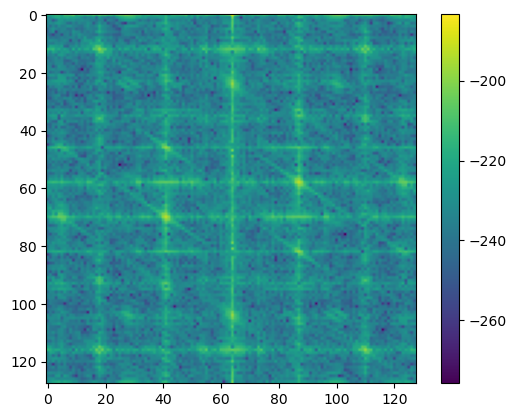

In [12]:
# 1)

# x_n1_n2 = sin(2 * pi * n1 + 3 * pi * n2) where x_n1_n2 is a matrix of size n1 * n2
n1 = 128
n2 = 128
x_n1_n2 = np.zeros((n1, n2))
for i in range(n1):
    for j in range(n2):
        x_n1_n2[i][j] = np.sin(2 * np.pi * i + 3 * np.pi * j)
plt.imshow(x_n1_n2)
plt.colorbar()
plt.show()

# spectrul
y_n1_n2 = np.fft.fft2(x_n1_n2)
plt.imshow(20*np.log10(abs(y_n1_n2)))
plt.colorbar()
plt.show()

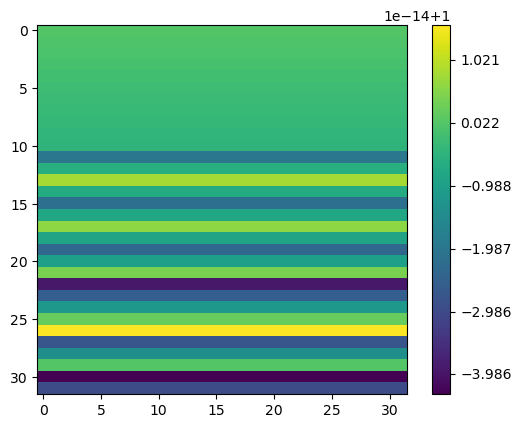

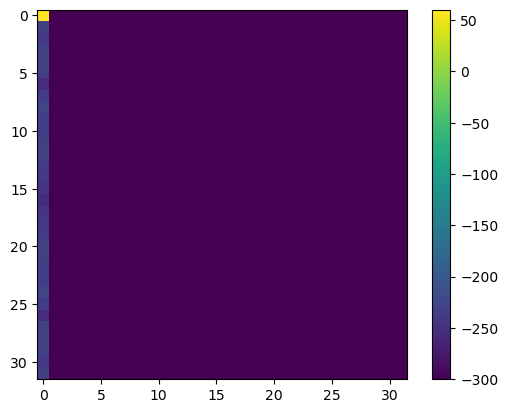

In [9]:
# x_n1_n2 = sin(4 * pi * n1) + cos(6 * pi * n2) where x_n1_n2 is a matrix of size n1 * n2
n1 = 32
n2 = 32
x_n1_n2 = np.zeros((n1, n2))
for i in range(n1):
    for j in range(n2):
        x_n1_n2[i][j] = np.sin(4 * np.pi * i) + np.cos(6 * np.pi * j)
plt.imshow(x_n1_n2)
plt.colorbar()
plt.show()

# spectrul
y_n1_n2 = np.fft.fft2(x_n1_n2)
plt.imshow(20*np.log10(abs(y_n1_n2) + 1e-15))
plt.colorbar()
plt.show()

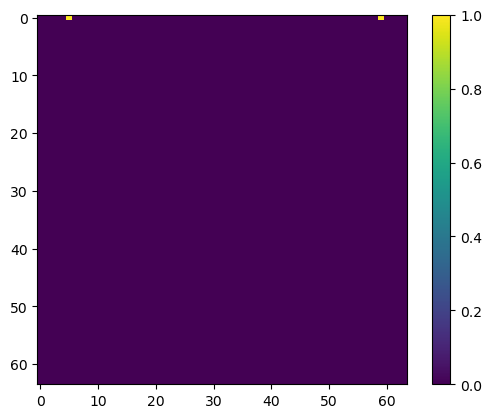

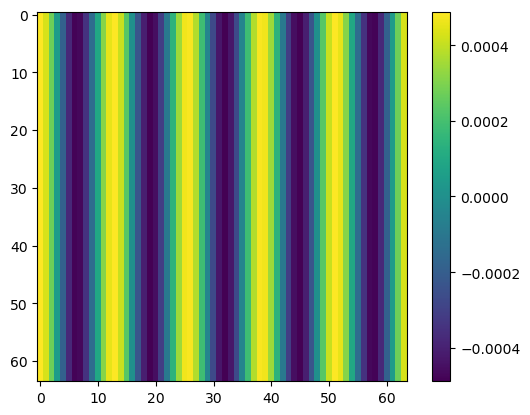

In [19]:
# Y_0_5 = Y_0_N-5 = 1, atlfel Y_m1_m2 = 0 oricare ar fi m1, m2
# Y reprezinta informatie in domeniul frecventei
N = 64
Y = np.zeros((N, N))
Y[0][5] = 1
Y[0][N-5] = 1
plt.imshow(Y)
plt.colorbar()
plt.show()

# afisarea imaginii
X = np.fft.ifft2(Y)
plt.imshow(np.real(X))
plt.colorbar()
plt.show()


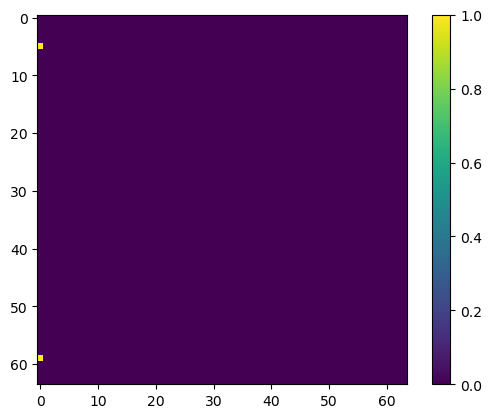

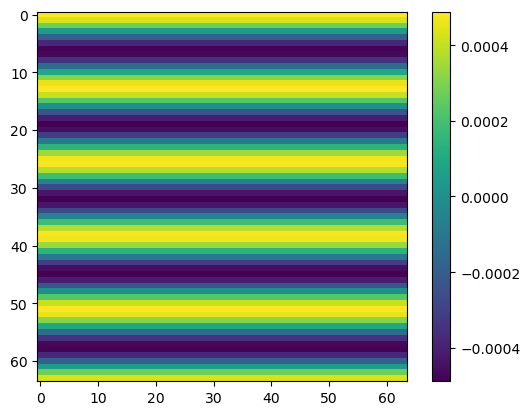

In [20]:
# Y_5_0 = Y_N-5_0 = 1, atlfel Y_m1_m2 = 0 oricare ar fi m1, m2
# Y reprezinta informatie in domeniul frecventei
N = 64
Y = np.zeros((N, N))
Y[5][0] = 1
Y[N-5][0] = 1
plt.imshow(Y)
plt.colorbar()
plt.show()

# afisarea imaginii
X = np.fft.ifft2(Y)
plt.imshow(np.real(X))
plt.colorbar()
plt.show()

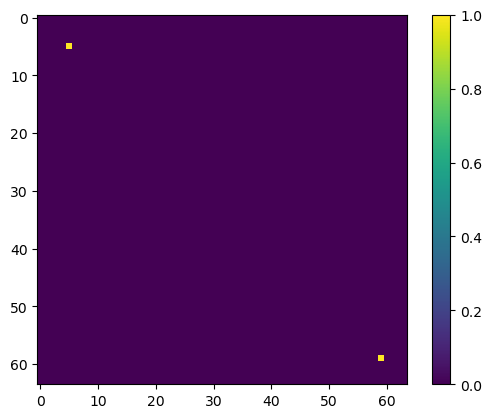

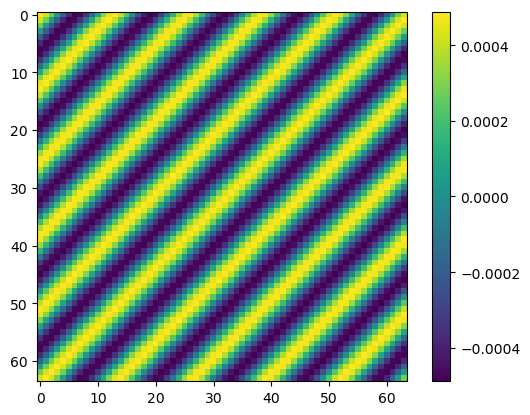

In [21]:
# Y_5_5 = Y_N-5_N-5 = 1, atlfel Y_m1_m2 = 0 oricare ar fi m1, m2
# Y reprezinta informatie in domeniul frecventei
N = 64
Y = np.zeros((N, N))
Y[5][5] = 1
Y[N-5][N-5] = 1
plt.imshow(Y)
plt.colorbar()
plt.show()

# afisarea imaginii
X = np.fft.ifft2(Y)
plt.imshow(np.real(X))
plt.colorbar()
plt.show()

C:\Users\Relu\AppData\Local\Temp\ipykernel_14224\2744337436.py:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  raton_img = misc.face(gray=True)


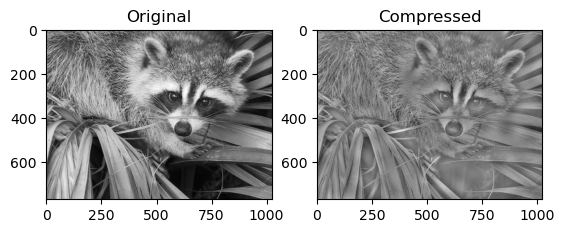

In [59]:
# Comprimati imaginea cu ratonul de mai sus prin atenuarea frecventelor inalte pana la un prag SNR autoimpus
raton_img = misc.face(gray=True)
Y_raton = np.fft.fft2(raton_img)
SNR = 0.01

def calc_snr(orig_img, compressed_img):
    noise = orig_img - compressed_img
    noise_power = np.sum(noise**2)
    # make sure we don't divide by 0
    if noise_power == 0:
        return np.inf
    return np.sum(orig_img ** 2) / noise_power

raton_img_compressed = raton_img.copy()

for i in range(50):
    computed_snr = calc_snr(raton_img, raton_img_compressed)
    if computed_snr <= SNR:
        break
    Y = np.fft.fft2(raton_img_compressed)
    # the center of the fourier transform of a 2d fft represents the average of the image.
    # preserving the dc component ensures that the average brightness of the image is preserved
    center = Y[0, 0]
    Y[0, 0] = 0
    threshold = np.max(np.abs(Y)) * 0.99
    Y[np.abs(Y) >= threshold] = 0
    Y[0, 0] = center
    raton_img_compressed = np.fft.ifft2(Y).real

fix, axs = plt.subplots(1, 2)
axs[0].imshow(raton_img, cmap=plt.cm.gray)
axs[0].set_title('Original')
axs[1].imshow(raton_img_compressed, cmap=plt.cm.gray)
axs[1].set_title('Compressed')
plt.show()

In [80]:
def gaussian2d(h, w, sigma):
    gaussian_filter = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            gaussian_filter[i][j] = np.exp(-((i - h/2)**2 + (j - w/2)**2) / (2 * sigma**2))
    return gaussian_filter

0.04288340178141448
0.2441948621185254
0.19827968616983185


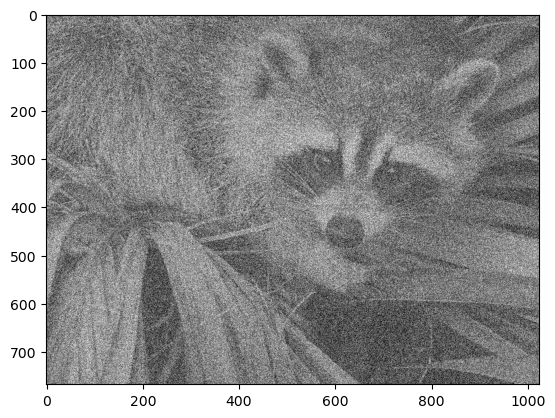

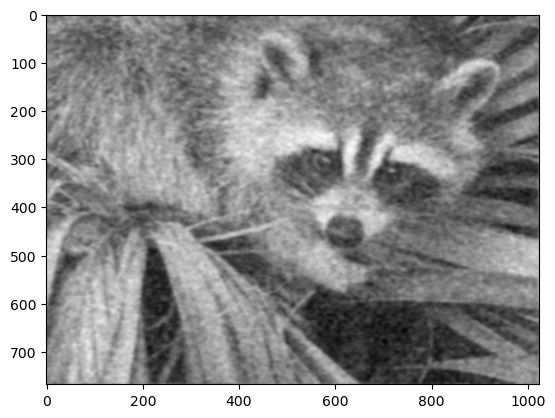

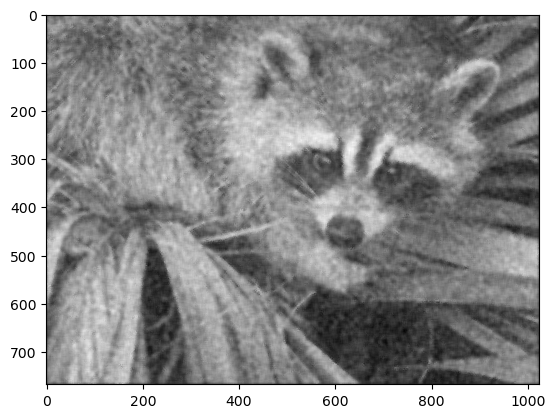

In [105]:
# 3) Eliminati zgomotul adaugat la imaginea cu ratonul produsa mai sus. Prezentati raportul SNR inainte si dupa.
snr_noisy = calc_snr(raton_img, X_noisy)
print(snr_noisy)

Y_shifted_noisy = np.fft.fftshift(np.fft.fft2(X_noisy))

gaussian_filter = gaussian2d(Y_shifted_noisy.shape[0], Y_shifted_noisy.shape[1], 45)

Y_filtered = np.multiply(Y_shifted_noisy, gaussian_filter)
X_filtered = np.fft.ifft2(np.fft.ifftshift(Y_filtered)).real
X_filtered_wiener = wiener(X_noisy, (10, 10)) # testing wiener filter

snr_filtered = calc_snr(raton_img, X_filtered)
snr_filtered_wiener = calc_snr(raton_img, X_filtered_wiener) 
print(snr_filtered)
print(snr_filtered_wiener)
# plt.figure(123)
# plt.imshow(gaussian_filter)
# plt.show()
# plt.figure(123456)
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.show()
plt.figure(12345)
plt.imshow(X_filtered, cmap=plt.cm.gray)
plt.show()
plt.figure(123456)
plt.imshow(X_filtered_wiener, cmap=plt.cm.gray)
plt.show()
